In [9]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [10]:
t_ones = torch.ones(2, 3)
t_ones.shape
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [11]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.0293, 0.7999, 0.3971],
        [0.7544, 0.5695, 0.4388]])


In [12]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [13]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(f'{t.shape} --> {t_tr.shape}')

torch.Size([3, 5]) --> torch.Size([5, 3])


In [14]:
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [15]:
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(f'{t.shape} --> {t_sqz.shape}')

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [16]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [17]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [18]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [19]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [20]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [21]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [22]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [23]:
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [24]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [25]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [26]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [27]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [28]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [29]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'배치 {i} : ', batch)

배치 1 :  tensor([0., 1., 2.])
배치 2 :  tensor([3., 4., 5.])


In [30]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [31]:
from torch.utils.data import Dataset


class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


joint_dataset = JointDataset(t_x, t_y)

In [32]:
for example in joint_dataset:
    print('x : ', example[0], ' y : ', example[1])

x :  tensor([0.7576, 0.2793, 0.4031])  y :  tensor(0)
x :  tensor([0.7347, 0.0293, 0.7999])  y :  tensor(1)
x :  tensor([0.3971, 0.7544, 0.5695])  y :  tensor(2)
x :  tensor([0.4388, 0.6387, 0.5247])  y :  tensor(3)


In [33]:
from torch.utils.data import TensorDataset

joint_dataset = TensorDataset(t_x, t_y)

In [34]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'배치 {i} : ', 'x : ', batch[0], '\n          y : ', batch[1])

for epoch in range(2):
    print(f'epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'배치 {i} : ', 'x : ', batch[0], '\n          y : ', batch[1])

배치 1 :  x :  tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
          y :  tensor([2, 0])
배치 2 :  x :  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
          y :  tensor([1, 3])
epoch 1
배치 1 :  x :  tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
          y :  tensor([0, 2])
배치 2 :  x :  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
          y :  tensor([1, 3])
epoch 2
배치 1 :  x :  tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
          y :  tensor([3, 2])
배치 2 :  x :  tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
          y :  tensor([0, 1])


In [35]:
import pathlib

imgdir_path = pathlib.Path('../data/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['../data/cat_dog_images/cat-01.jpg', '../data/cat_dog_images/cat-02.jpg', '../data/cat_dog_images/cat-03.jpg', '../data/cat_dog_images/dog-01.jpg', '../data/cat_dog_images/dog-02.jpg', '../data/cat_dog_images/dog-03.jpg']


Image shape :  (900, 1200, 3)
Image shape :  (900, 1200, 3)
Image shape :  (900, 742, 3)
Image shape :  (800, 1200, 3)
Image shape :  (800, 1200, 3)
Image shape :  (900, 1200, 3)


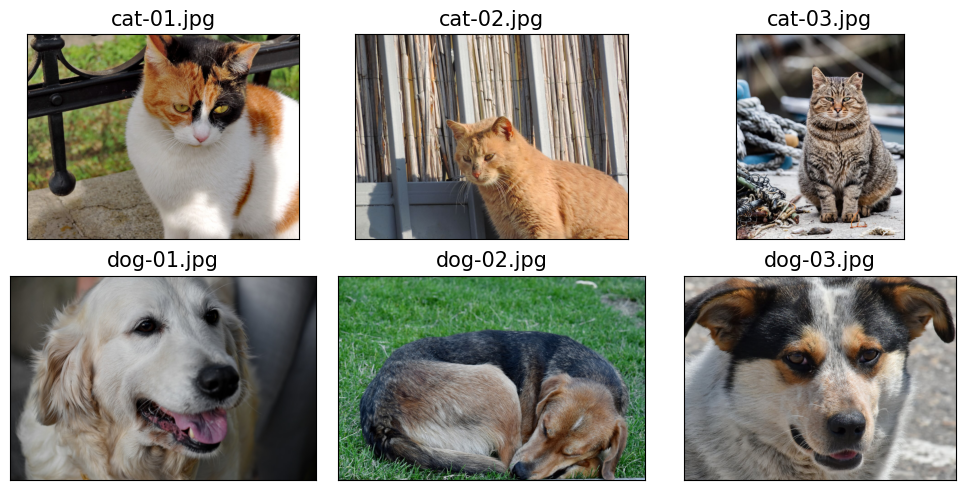

In [36]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape : ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [37]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [38]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

../data/cat_dog_images/cat-01.jpg 0
../data/cat_dog_images/cat-02.jpg 0
../data/cat_dog_images/cat-03.jpg 0
../data/cat_dog_images/dog-01.jpg 1
../data/cat_dog_images/dog-02.jpg 1
../data/cat_dog_images/dog-03.jpg 1


In [39]:
import torchvision.transforms as transforms

img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width), antialias=True),
])


class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels, transform)

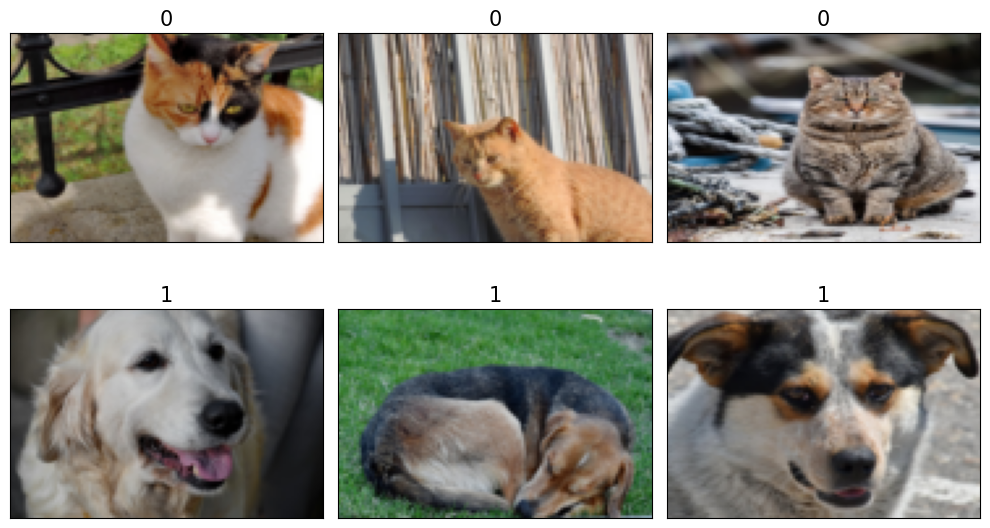

In [40]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow((example[0].numpy().transpose((1, 2, 0)) * 255).astype(np.uint8))
    ax.set_title(f'{example[1]}', size=15)
plt.tight_layout()
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x14A0C9D10>, 5)


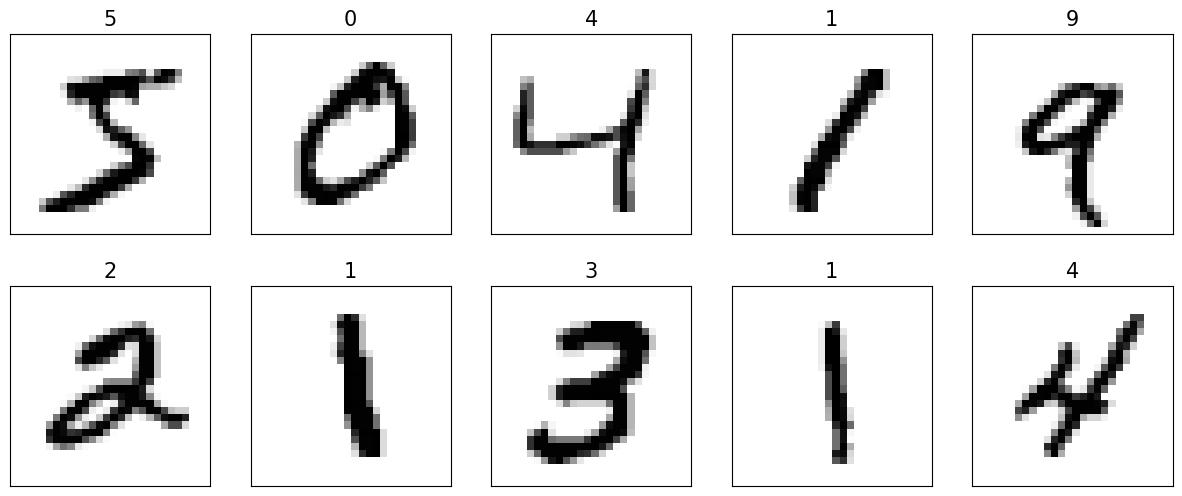

In [41]:
from itertools import islice
import torchvision

image_path = '../data'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.show()

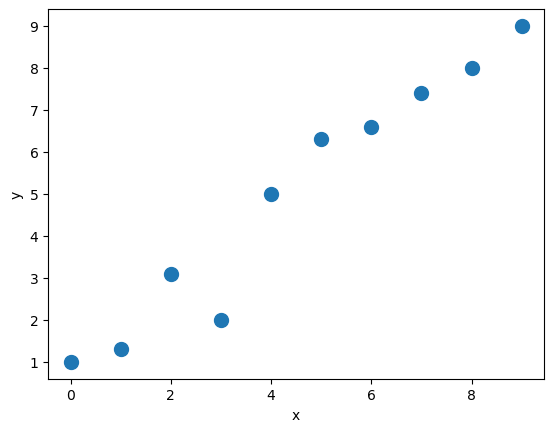

In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [45]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)


def loss_fn(input, target):
    return (input - target).pow(2).mean()


def model(xb):
    return xb @ weight + bias


learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs == 0:
        print(f'에포크 {epoch}  손실 {loss.item():.4f}')

에포크 0  손실 45.0782
에포크 10  손실 26.4366
에포크 20  손실 1.5918
에포크 30  손실 14.1307
에포크 40  손실 11.6038
에포크 50  손실 6.3084
에포크 60  손실 0.6349
에포크 70  손실 3.1374
에포크 80  손실 1.9999
에포크 90  손실 0.3133
에포크 100  손실 0.7653
에포크 110  손실 1.0039
에포크 120  손실 0.0235
에포크 130  손실 0.5176
에포크 140  손실 0.0759
에포크 150  손실 1.8789
에포크 160  손실 0.0008
에포크 170  손실 0.0866
에포크 180  손실 0.0646
에포크 190  손실 0.0011


최종 파라미터 :  2.6696107387542725 4.879678249359131


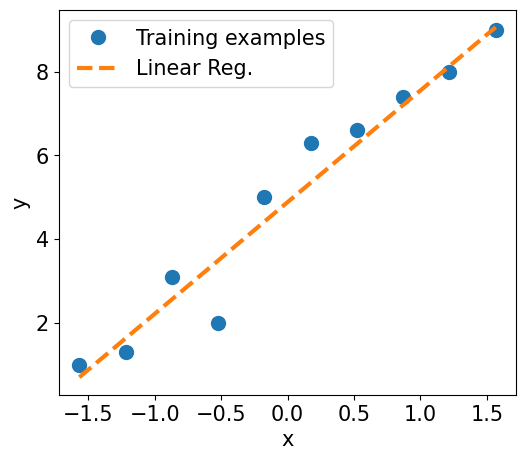

In [46]:
print('최종 파라미터 : ', weight.item(), bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'에포크 {epoch} 손실 {loss.item():.4f}')

에포크 0 손실 17.3596
에포크 10 손실 0.5473
에포크 20 손실 8.7409
에포크 30 손실 0.1664
에포크 40 손실 1.8662
에포크 50 손실 0.2789
에포크 60 손실 0.5117
에포크 70 손실 0.9404
에포크 80 손실 0.0227
에포크 90 손실 1.2027
에포크 100 손실 0.0501
에포크 110 손실 0.0906
에포크 120 손실 0.0746
에포크 130 손실 0.4006
에포크 140 손실 0.2038
에포크 150 손실 0.4675
에포크 160 손실 0.1890
에포크 170 손실 0.1132
에포크 180 손실 0.1179
에포크 190 손실 0.0776


최종 파라미터 :  2.6615240573883057 4.8941874504089355


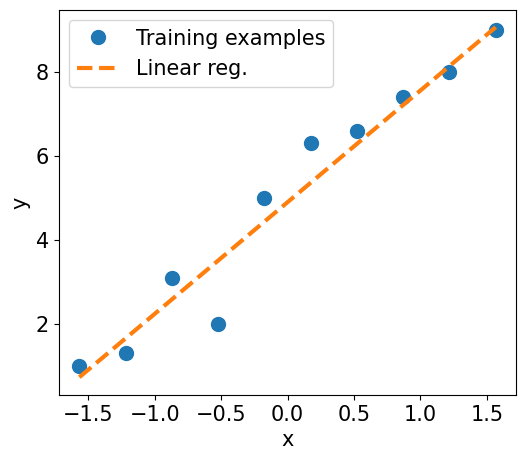

In [49]:
print('최종 파라미터 : ', model.weight.item(), model.bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1. / 3, random_state=1)

In [51]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [52]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x


input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [53]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

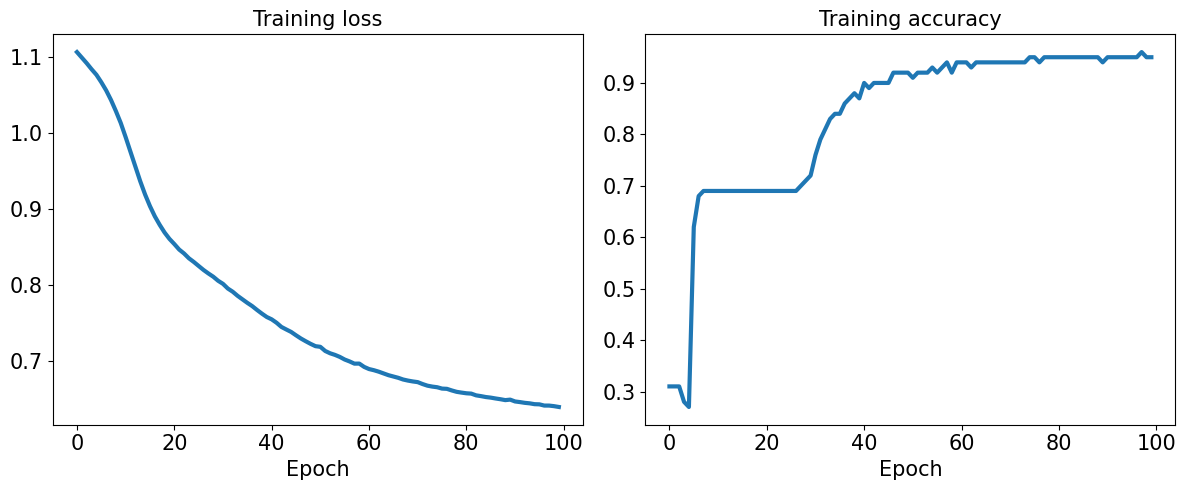

In [54]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()

In [55]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도 : {accuracy:.4f}')

테스트 정확도 : 0.9800


In [56]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [57]:
model_new = torch.load(path)
model_new.eval()

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_17741/1720672439.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new = torch.load(path)


Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [58]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도 : {accuracy:.4f}')

테스트 정확도 : 0.9800


In [59]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [60]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_17741/2037207677.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new.load_state_dict(torch.load(path))


<All keys matched successfully>

In [61]:
import numpy as np

X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])


def net_input(X, w):
    return np.dot(X, w)


def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))


def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)


print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [62]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('최종 입력 : ', Z)

print('출력 : ', y_probas)

최종 입력 :  [1.78 0.76 1.65]
출력 :  [0.856 0.681 0.839]


In [63]:
y_class = np.argmax(Z, axis=0)
print('예측 클래스 레이블 : ', y_class)

예측 클래스 레이블 :  0


In [64]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))


y_probas = softmax(Z)
print('확률 : ', y_probas)
np.sum(y_probas)

확률 :  [0.447 0.161 0.392]


1.0

In [65]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

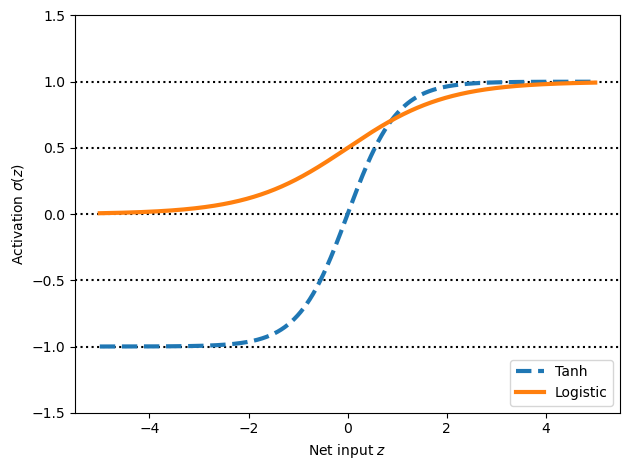

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)


z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\sigma(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='Tanh')
plt.plot(z, log_act, linewidth=3, label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [67]:
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [68]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [69]:
from scipy.special import expit

expit(z)

array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [70]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

In [71]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)